<a href="https://colab.research.google.com/github/Catia2021/Projeto7_MachineLearning_Acidentes/blob/main/ProjetoAcidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tema do Projeto: Acidentes Aéreos

#Apresentação dos Dados

Neste estudo serão utilizados dados coletados do repositório Kaggle disponibilizados no seguinte link: (https://www.kaggle.com/nosbielcs/opendataaigbrazil

Com base neste dataset, será feito um modelo preditivo para classificar o tipo de acidente aéreo.


#Problema a ser resolvido

Construir  um modelo de Machine Learning que  seja  capaz de fazer previsões sobre os  tipos de acidentes aéreos. 

#Objetivos do Projeto  

Instalar e importar bibliotecas apropriadas

Pré-processar os dados

Estabelecer as Variáveis Preditoras e a de classe

Realizar tratamento de atributos categóricos usando o LabelEncoder

Escalonar os Atributos
Tratar os dados desbalanceados s/n

Dividir a base de dados em Treinamento e Teste

Treinar o algoritmos  KNN, SVM e Regresão Logística 

Testar o algoritmo utilizando a matriz de confusão, a função accuracy_score e a classification_report

#Importando Bibliotecas e Dados

In [ ]:
! pip install pyod

In [ ]:
!pip  install plotly --upgrade

In [7]:
import pandas as pd  # biblioteca para manipulação de dados   
import numpy as np # biblioteca para manipulação de  dados numéricos
import seaborn as sns # biblioteca para otimizar gráficos
import matplotlib.pyplot as plt # biblioteca para geração de gráficos
import plotly.express as px  # biblioteca para geração de gráficos interativos
import sklearn # bilioteca para subsidiar Machine Learning
import plotly.graph_objects as go # para concatenar graficos
from sklearn.preprocessing import StandardScaler #para escalonar variaveis
from sklearn.preprocessing import LabelEncoder #para transformar  variaveis
from sklearn.compose import ColumnTransformer #para transformar variaveis
from sklearn.model_selection import train_test_split  #para dividir base de teste e treinamento
from sklearn.metrics import accuracy_score #para avaliar a acurácia
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from numpy.ma.core import filled
from IPython.core.pylabtools import figsize
from pyod. models.knn import KNN
from sklearn.linear_model import LinearRegression # para algoritmo de regressão linear
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_absolute_error, mean_squared_error   
from imblearn.under_sampling import TomekLinks
import statsmodels.api as sm
from sklearn.svm import SVC
import  warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from google.colab import files
uploaded = files.upload()

Saving accidents.csv to accidents.csv


#Pré-Processamento dos Dados

In [8]:
Acidente = pd.read_csv('/content/accidents.csv' )

In [9]:
print( ' Este dataset tem %s linhas e %s colunas' % (Acidente.shape[0] , Acidente.shape[1] ) )
Acidente.head()

 Este dataset tem 5116 linhas e 116 colunas


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,fator_1,fator_2,fator_3,fator_4,fator_5,fator_6,fator_7,fator_8,fator_9,fator_10,fator_11,fator_12,...,fator_49,fator_50,fator_51,fator_52,fator_53,fator_54,fator_55,fator_56,fator_57,fator_58,fator_59,fator_60,fator_61,fator_62,fator_63,fator_64,fator_65,fator_66,fator_67,fator_68,fator_69,fator_70,fator_71,fator_72,fator_73,fator_74,fator_75,fator_76,fator_77,fator_78,fator_79,fator_80,fator_81,fator_82,fator_83,fator_84,fator_85,fator_86,fator_87,dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,ULTRALEVE,ORION LTDA,F1A EAGLE,PISTÃO,1.0,450,2.0,2005.0,BRASIL,PET,EXPERIMENTAL,****,****,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,AVIÃO,EMBRAER,ERJ 190-200 IGW,JATO,2.0,52290,125.0,2012.0,BRASIL,TPR,REGULAR,SSKW,SBCY,TÁXI,VOO REGULAR,NENHUM,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
2,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,2013-11-25,12:32:00,CACOAL,RO,BRASIL,SSKW,PTRDP,AVIÃO,EMBRAER,EMB-810C,PISTÃO,2.0,2073,7.0,1980.0,BRASIL,TPX,TÁXI AÉREO,SBJI,SSKW,POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
3,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,2016-05-13,19:19:00,CACOAL,RO,BRASIL,SSKW,PTYEL,HELICÓPTERO,BELL HELICOPTER,206L-4,TURBOEIXO,1.0,2018,7.0,1997.0,BRASIL,AIF,ADMINISTRAÇÃO INDIRETA,SSKW,SSKW,APROXIMAÇÃO FINAL,OPERAÇÃO ESPECIALIZADA,LEVE,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
4,201103187273112,INCIDENTE,OUTROS,2011-03-18,13:30:00,CEREJEIRAS,RO,BRASIL,****,PTUQW,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,PISTÃO,1.0,1800,1.0,2004.0,BRASIL,SAE,ESPECIALIZADA,****,****,TÁXI,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06


In [10]:
Acidente.tail()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,fator_1,fator_2,fator_3,fator_4,fator_5,fator_6,fator_7,fator_8,fator_9,fator_10,fator_11,fator_12,...,fator_49,fator_50,fator_51,fator_52,fator_53,fator_54,fator_55,fator_56,fator_57,fator_58,fator_59,fator_60,fator_61,fator_62,fator_63,fator_64,fator_65,fator_66,fator_67,fator_68,fator_69,fator_70,fator_71,fator_72,fator_73,fator_74,fator_75,fator_76,fator_77,fator_78,fator_79,fator_80,fator_81,fator_82,fator_83,fator_84,fator_85,fator_86,fator_87,dia_extracao
5111,200811264169752,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,2008-11-26,16:40:00,NÃO IDENTIFICADA,SP,BRASIL,****,PRPSD,AVIÃO,EMBRAER,EMB-120ER,TURBOÉLICE,2.0,11990,34.0,1989.0,BRASIL,TPR,REGULAR,****,****,CRUZEIRO,VOO REGULAR,NENHUM,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
5112,200811224318981,INCIDENTE,TRÁFEGO AÉREO,2008-11-22,11:55:00,NÃO IDENTIFICADA,SP,BRASIL,****,PTMVE,AVIÃO,AIRBUS INDUSTRIE,A330-223,JATO,2.0,230000,243.0,2000.0,BRASIL,TPR,REGULAR,****,****,DESCIDA,VOO REGULAR,NENHUM,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
5113,200810318709738,INCIDENTE,POUSO SEM TREM,2008-10-31,18:00:00,NÃO IDENTIFICADA,GO,BRASIL,****,PTLHE,AVIÃO,PIPER AIRCRAFT,PA-31,PISTÃO,2.0,2948,8.0,1974.0,BRASIL,TPP,PARTICULAR,****,****,POUSO,VOO PRIVADO,SUBSTANCIAL,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
5114,201309012098180,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,2013-09-02,02:54:00,ÁGUAS INTERNACIONAIS,***,BRASIL,****,PTMVL,AVIÃO,AIRBUS INDUSTRIE,A330-203,JATO,2.0,233000,242.0,2005.0,BRASIL,TPR,REGULAR,LEMD,SBGR,CRUZEIRO,VOO REGULAR,LEVE,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
5115,200803063018556,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,2008-03-06,07:55:00,ÁGUAS INTERNACIONAIS,***,BRASIL,****,PTMVA,AVIÃO,AIRBUS INDUSTRIE,A330-223,JATO,2.0,230000,243.0,1998.0,BRASIL,TPR,REGULAR,****,****,CRUZEIRO,VOO REGULAR,NENHUM,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06


**Acima você pode conferir as primeiras e últimas linhas do dataset e o total de linhas e colunas.E serão removidas algumas  colunas, visto não serem necessárias para o projeto.**

In [11]:
Acidente.drop(['codigo_ocorrencia', 'ocorrencia_dia', 'ocorrencia_horario','ocorrencia_cidade','ocorrencia_uf','ocorrencia_pais','ocorrencia_aerodromo','aeronave_matricula','aeronave_peso_maximo_decolagem','aeronave_quantidade_assentos','aeronave_pais_registro','aeronave_categoria_registro','aeronave_origem_voo','aeronave_destino_voo',
               'quantidade_fatalidades','quantidade_fatores_contribuintes','fator_1','fator_2','fator_3','fator_4','fator_5','fator_6','dia_extracao'],axis=1, inplace=True )

In [12]:
Acidente.drop(Acidente.columns[[13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1, inplace=True)

In [13]:
Acidente.drop(Acidente.columns[[12,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]], axis=1, inplace=True)

In [14]:
Acidente.drop(Acidente.columns[[13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis=1, inplace=True)

In [15]:
Acidente.drop(Acidente.columns[[13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis=1, inplace=True)

In [16]:
Acidente.drop(Acidente.columns[[13,14,15,16,]], axis=1, inplace=True)

In [17]:
Acidente.drop(['fator_25'], axis=1, inplace=True)

In [18]:
Acidente.head(1)

,ocorrencia_classificacao,ocorrencia_tipo,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_ano_fabricacao,aeronave_segmento_aviacao,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano
0,ACIDENTE,FALHA DO MOTOR EM VOO,ULTRALEVE,ORION LTDA,F1A EAGLE,PISTÃO,1.0,2005.0,EXPERIMENTAL,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL


**Vejamos um resumo do dataset**

In [19]:
Acidente.describe()

,aeronave_quantidade_motores,aeronave_ano_fabricacao
count,5087.000000,5053.00000
mean,1.493218,1928.06887
std,0.560096,350.12826
min,0.000000,0.00000
25%,1.000000,1979.00000
50%,1.000000,1992.00000
75%,2.000000,2006.00000
max,4.000000,2017.00000


**Em  relação às variáveis numéricas, se percebe que  a média de  quantidade de motores é de 1,5 , porém tem aeronaves com zero de  quantidade, assim como a especificação do ano de  fabricação se apresenta  com zero, o que indica que  há um erro. Será avaliado, dessa  forma  os dados missing.**

In [ ]:
Acidente.isnull()

In [21]:
Acidente.isnull().sum()

ocorrencia_classificacao        0
ocorrencia_tipo                 0
aeronave_equipamento            0
aeronave_fabricante             0
aeronave_modelo                 0
aeronave_tipo_motor             0
aeronave_quantidade_motores    29
aeronave_ano_fabricacao        63
aeronave_segmento_aviacao       0
aeronave_fase_voo               0
aeronave_tipo_operacao          0
aeronave_nivel_dano             0
dtype: int64

In [ ]:
Acidente.loc[Acidente['aeronave_ano_fabricacao']<=0]

**Diante  do  número elevado de valores missing nestas duas  variáveis,  serão removidas as  colunas.**

In [23]:
Acidente.drop(['aeronave_quantidade_motores','aeronave_ano_fabricacao' ], axis=1, inplace=True)

In [24]:
Acidente.head(1)

,ocorrencia_classificacao,ocorrencia_tipo,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_segmento_aviacao,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano
0,ACIDENTE,FALHA DO MOTOR EM VOO,ULTRALEVE,ORION LTDA,F1A EAGLE,PISTÃO,EXPERIMENTAL,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL


**Verificando o Tipo de registro nas colunas**

In [25]:
np.unique(Acidente['aeronave_nivel_dano'],return_counts=True)

(array(['***', 'DESTRUÍDA', 'LEVE', 'NENHUM', 'SUBSTANCIAL'], dtype=object),
 array([ 114,  337, 1327, 1872, 1466]))

In [26]:
np.unique(Acidente['aeronave_tipo_operacao'],return_counts=True)


(array(['***', 'OPERAÇÃO AGRÍCOLA', 'OPERAÇÃO ESPECIALIZADA',
        'OPERAÇÃO POLICIAL', 'TÁXI AÉREO', 'VOO DE INSTRUÇÃO',
        'VOO EXPERIMENTAL', 'VOO NÃO REGULAR', 'VOO PRIVADO',
        'VOO REGULAR'], dtype=object),
 array([  63,  381,   87,  123,  763,  751,  264,   46, 1575, 1063]))

In [27]:
np.unique(Acidente['aeronave_fase_voo'],return_counts=True)

(array(['APROXIMAÇÃO FINAL', 'ARREMETIDA NO AR', 'ARREMETIDA NO SOLO',
        'CHEQUE DE MOTOR OU ROTOR', 'CIRCUITO DE TRÁFEGO',
        'CORRIDA APÓS POUSO', 'CRUZEIRO', 'DECOLAGEM',
        'DECOLAGEM VERTICAL', 'DESCIDA', 'DESCIDA DE EMERGÊNCIA',
        'DESCIDA DESCONTROLADA', 'EMPREGO MILITAR', 'ESPECIALIZADA',
        'ESPERA', 'ESTACIONAMENTO', 'INDETERMINADA', 'MANOBRA',
        'NAVEGAÇÃO A BAIXA ALTURA', 'OPERAÇÃO DE SOLO', 'OUTRA FASE',
        'PAIRADO', 'PARTIDA DO MOTOR', 'POUSO',
        'PROCEDIMENTO DE APROXIMAÇÃO IFR', 'PUSHBACK', 'RETA FINAL',
        'SAÍDA IFR', 'SUBIDA', 'TÁXI'], dtype=object),
 array([229,  24,  42,  13, 124, 594, 645, 783,   8, 190,   1,   2,   1,
        173,   4,  72,  70, 159,  59,  45, 101,  20,  30, 902,   7,   6,
         15,   7, 357, 433]))

In [28]:
np.unique(Acidente['aeronave_segmento_aviacao'],return_counts=True)

(array(['***', 'ADMINISTRAÇÃO DIRETA', 'ADMINISTRAÇÃO INDIRETA',
        'AGRÍCOLA', 'ESPECIALIZADA', 'EXPERIMENTAL', 'HISTÓRICA',
        'INSTRUÇÃO', 'MÚLTIPLA', 'NÃO REGULAR', 'PARTICULAR', 'REGULAR',
        'TÁXI AÉREO'], dtype=object),
 array([  83,  143,   11,  276,  113,  364,    1,  771,   28,   22, 1497,
        1034,  773]))

In [29]:
np.unique(Acidente['aeronave_tipo_motor'],return_counts=True)

(array(['***', 'JATO', 'PISTÃO', 'SEM TRAÇÃO', 'TURBOEIXO', 'TURBOÉLICE'],
       dtype=object), array([  51, 1011, 2960,   17,  464,  613]))

In [ ]:
np.unique(Acidente['aeronave_modelo'],return_counts=True)

In [ ]:
np.unique(Acidente['aeronave_fabricante'],return_counts=True)

In [32]:
np.unique(Acidente['aeronave_equipamento'],return_counts=True)

(array(['***', 'ANFÍBIO', 'AVIÃO', 'BALÃO', 'DIRIGÍVEL', 'HELICÓPTERO',
        'HIDROAVIÃO', 'PLANADOR', 'TRIKE', 'ULTRALEVE'], dtype=object),
 array([  15,   12, 4220,    1,    2,  585,    1,   17,    2,  261]))

In [ ]:
np.unique(Acidente['ocorrencia_tipo'],return_counts=True)

In [34]:
np.unique(Acidente['ocorrencia_classificacao'],return_counts=True)

(array(['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE'], dtype=object),
 array([1677, 2817,  622]))

Os  registros  se apresentam  com  elevado número de dados inconsistentes, e  por se tratar de variáveis muito  diferentes, não será escolhido
 fazer uma atribuição para cada registro . Serão removidas as colunas.

In [35]:
Acidente.drop(['aeronave_equipamento','aeronave_modelo','aeronave_segmento_aviacao','aeronave_tipo_operacao','aeronave_fabricante','aeronave_tipo_motor' ], axis=1, inplace=True)

In [36]:
Acidente.head()

,ocorrencia_classificacao,ocorrencia_tipo,aeronave_fase_voo,aeronave_nivel_dano
0,ACIDENTE,FALHA DO MOTOR EM VOO,CIRCUITO DE TRÁFEGO,SUBSTANCIAL
1,INCIDENTE,AERÓDROMO,TÁXI,NENHUM
2,INCIDENTE GRAVE,POUSO SEM TREM,POUSO,SUBSTANCIAL
3,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,APROXIMAÇÃO FINAL,LEVE
4,INCIDENTE,OUTROS,TÁXI,SUBSTANCIAL


In [37]:
Acidente.dtypes

ocorrencia_classificacao    object
ocorrencia_tipo             object
aeronave_fase_voo           object
aeronave_nivel_dano         object
dtype: object

**Se tem 4 variáveis Categóricas, assim classificadas:**


Ocorrencia_classificacao, aeronave_nivel_dano: Categórica Ordinal

Ocorrencia_tipo, aeronave_fase_voo: Categórica Nominal




**Dicionário de Dados**



* Ocorrencia_classificacao: refere-se à gravidade do acidente
*   Aeronave_nivel_dano: refere-se ao grau do  dano ocasionado na aeronave


*   Ocorrencia_tipo:tipo de problema que ocasionou o acidente
*   Aeronave_fase_voo:fase do vôo em que se deu o acidente





#Visualizando Gráficos

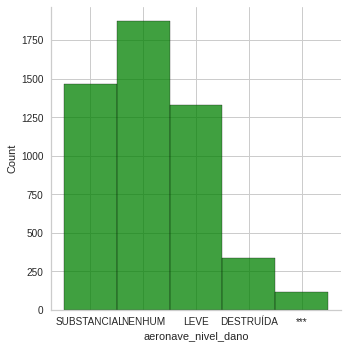

In [38]:
sns.displot(Acidente['aeronave_nivel_dano'],color='green')

In [39]:
Grafico = Acidente['aeronave_fase_voo'].value_counts()

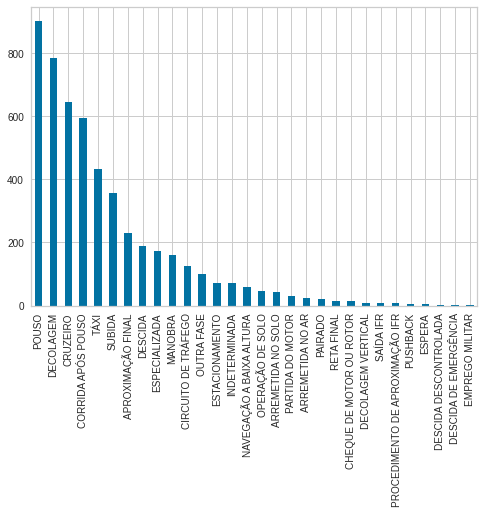

In [40]:
Grafico.plot(kind='bar')

In [41]:
Grafico1 = Acidente['ocorrencia_classificacao'].value_counts()

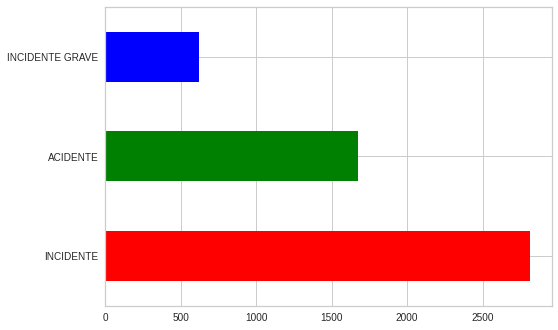

In [42]:
Grafico1.plot(kind ='barh',color=['red','green','blue'])

**Pela análise acima,percebe-se  que  há  maior  quantidade de incidentes, as fases  do vôo  que ocorrem mais  acidentes é no pouso, seguida da  decolagem.** **O nível  de dano  prevalente  é o nenhum dano, seguido do substancial e leve.**
**Como foi  verificado que  há   registros  inconsistentes   no nível de dano,  será  realizado o tratamento destes registros , com a atribuição de  registros. **

In [43]:
Acidente['aeronave_nivel_dano']= Acidente['aeronave_nivel_dano'].replace(['***'],['LEVE'])

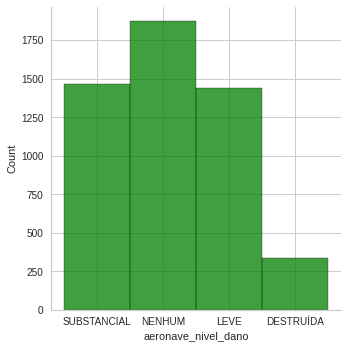

In [44]:
sns.displot(Acidente['aeronave_nivel_dano'],color='green')

#Preparando o banco de dados para análise dos algoritmos

#Dividindo as Variáveis Preditoras e de Classe

**Serão criadas duas variáveis: a X será a variável preditora e a Y a de classe **

In [45]:
X_Acidente = Acidente.iloc[:,1:4].values

In [46]:
X_Acidente

array([['FALHA DO MOTOR EM VOO', 'CIRCUITO DE TRÁFEGO', 'SUBSTANCIAL'],
       ['AERÓDROMO', 'TÁXI', 'NENHUM'],
       ['POUSO SEM TREM', 'POUSO', 'SUBSTANCIAL'],
       ...,
       ['POUSO SEM TREM', 'POUSO', 'SUBSTANCIAL'],
       ['CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO', 'CRUZEIRO', 'LEVE'],
       ['FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE ',
        'CRUZEIRO', 'NENHUM']], dtype=object)

In [47]:
Y_Acidente = Acidente.iloc[:,0].values

In [48]:
Y_Acidente

array(['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE', ..., 'INCIDENTE',
       'ACIDENTE', 'INCIDENTE'], dtype=object)

#Tratando atributos Categóricos com Label Encoder

In [49]:
label_encoder_ocorrencia_tipo = LabelEncoder()
label_encoder_aeronave_fase_voo = LabelEncoder()
label_encoder_aeronave_nivel_dano = LabelEncoder()

In [50]:
X_Acidente[:,0]=label_encoder_ocorrencia_tipo.fit_transform(X_Acidente[:,0])
X_Acidente[:,1]=label_encoder_aeronave_fase_voo.fit_transform(X_Acidente[:,1])

In [51]:
X_Acidente[:,2]=label_encoder_aeronave_nivel_dano.fit_transform(X_Acidente[:,2])

In [52]:
X_Acidente

array([[27, 4, 3],
       [1, 29, 2],
       [50, 23, 3],
       ...,
       [50, 23, 3],
       [3, 6, 1],
       [30, 6, 2]], dtype=object)

#Tratando os Dados Desbalanceados com Tomek Links

In [53]:
np.unique(Acidente['ocorrencia_classificacao'],return_counts=True)

(array(['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE'], dtype=object),
 array([1677, 2817,  622]))

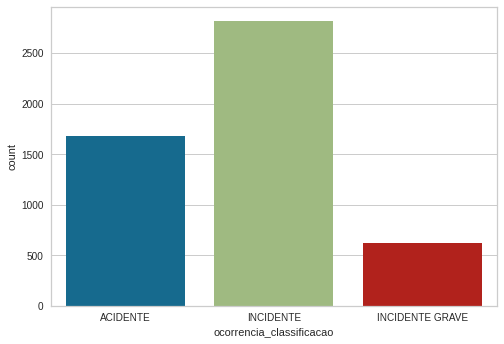

In [54]:
sns.countplot(x=Acidente['ocorrencia_classificacao'])

In [55]:
from imblearn.under_sampling import TomekLinks

In [56]:
tl= TomekLinks(sampling_strategy='majority')

In [57]:
X_under, Y_under = tl.fit_resample(X_Acidente,Y_Acidente)

In [58]:
X_under.shape,Y_under.shape

((5093, 3), (5093,))

In [59]:
np.unique(Y_Acidente,return_counts=True)

(array(['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE'], dtype=object),
 array([1677, 2817,  622]))

In [60]:
np.unique(Y_under,return_counts=True)

(array(['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE'], dtype=object),
 array([1677, 2794,  622]))

#Escalonando os Atributos

In [61]:
X_under[:,0].min(),X_under[:,1].min(),X_under[:,2].min()

(0.0, 0.0, 0.0)

In [62]:
X_under[:,0].max(),X_under[:,2].max(),X_under[:,1].max()

(59.0, 3.0, 29.0)

**Como há muito discrepância entre os valores será feita a padronização dos valores.**

In [63]:
scaler_Acidente = StandardScaler()
X_under = scaler_Acidente.fit_transform(X_under)

In [64]:
X_under

array([[-0.32749518, -1.04944605,  1.24559347],
       [-2.21923556,  1.59457157,  0.13962981],
       [ 1.34596747,  0.96000734,  1.24559347],
       ...,
       [ 1.34596747,  0.96000734,  1.24559347],
       [-2.07371707, -0.83792464, -0.96633385],
       [-0.10921744, -0.83792464,  0.13962981]])

**Feito a Padronização, se procede à divisão das bases de dados em Treinamento e Teste.**

#Divisão Base de Treinamento e Teste

**Serão criados 4 variáveis , duas para treinamento e 2 para teste.**

In [65]:
X_under_treinamento, X_under_teste,Y_under_treinamento,Y_under_teste = train_test_split(X_under,Y_under, test_size=0.25,random_state=0)

**Verificando as variáveis criadas.**

In [66]:
X_under_treinamento.shape

(3819, 3)

In [67]:
X_under_teste.shape

(1274, 3)

In [68]:
Y_under_treinamento.shape

(3819,)

In [69]:
Y_under_teste.shape

(1274,)

In [70]:
X_under_teste.shape,Y_under_teste.shape

((1274, 3), (1274,))

#Treinando e Testando o Algoritmo SVM

In [71]:
svm_Acidente= SVC(kernel='rbf',random_state= 1,C=1.0)

In [72]:
svm_Acidente.fit(X_under_treinamento,Y_under_treinamento)

SVC(random_state=1)

In [73]:
previsoes = svm_Acidente.predict(X_under_teste)
previsoes

array(['INCIDENTE', 'INCIDENTE', 'INCIDENTE', ..., 'INCIDENTE',
       'INCIDENTE', 'ACIDENTE'], dtype=object)

In [74]:
Y_under_teste

array(['INCIDENTE', 'ACIDENTE', 'ACIDENTE', ..., 'INCIDENTE', 'INCIDENTE',
       'ACIDENTE'], dtype=object)

#Métricas de Avaliação do Algoritmo SVM

In [75]:
accuracy_score(Y_under_teste,previsoes)

0.8273155416012559

In [76]:
confusion_matrix(Y_under_teste,previsoes)

array([[376,  35,   0],
       [ 17, 678,   0],
       [ 53, 115,   0]])

0.8273155416012559

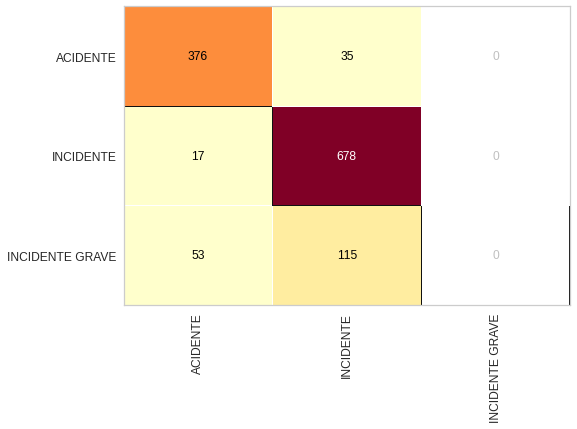

In [77]:
cm = ConfusionMatrix(svm_Acidente)
cm.fit(X_under_treinamento, Y_under_treinamento)
cm.score(X_under_teste,Y_under_teste)

**Avaliando Precisão e Sensibilidade**

In [87]:
print (classification_report(Y_under_teste,previsoes))

                 precision    recall  f1-score   support

       ACIDENTE       0.84      0.91      0.88       411
      INCIDENTE       0.82      0.98      0.89       695
INCIDENTE GRAVE       0.00      0.00      0.00       168

       accuracy                           0.83      1274
      macro avg       0.55      0.63      0.59      1274
   weighted avg       0.72      0.83      0.77      1274



O Algoritmo é muito bom  para prever acidente e incidente e quando detecta,  tem boa precisão. Porém não consgue detectar incidente grave. Já  a  acurácia é  boa. Deverá ser  reavaliado os registros da variável target para incidente grave.

#Treinando e testando o algoritmo KNN

In [79]:
KNN_Acidente = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)

In [80]:
KNN_Acidente.fit(X_under_treinamento,Y_under_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [81]:
previsoes1=KNN_Acidente.predict(X_under_teste)
previsoes1

array(['INCIDENTE', 'INCIDENTE', 'INCIDENTE', ..., 'INCIDENTE',
       'INCIDENTE', 'ACIDENTE'], dtype=object)

In [82]:
Y_under_teste

array(['INCIDENTE', 'ACIDENTE', 'ACIDENTE', ..., 'INCIDENTE', 'INCIDENTE',
       'ACIDENTE'], dtype=object)

#Métricas de Avaliação do Algoritmo KNN

In [83]:
accuracy_score(Y_under_teste,previsoes)

0.8273155416012559

In [84]:
confusion_matrix(Y_under_teste,previsoes1)

array([[366,  32,  13],
       [ 14, 658,  23],
       [ 38,  98,  32]])

0.8288854003139717

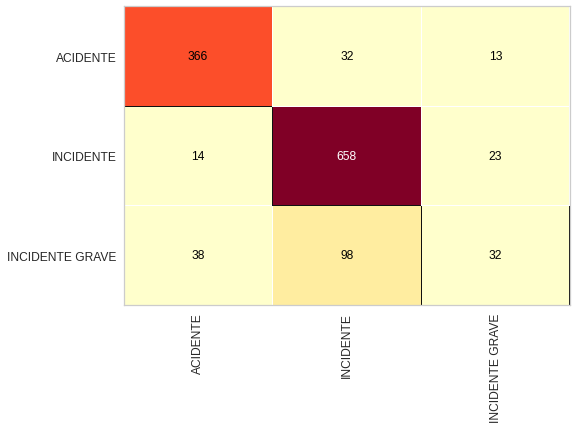

In [85]:
cm = ConfusionMatrix(KNN_Acidente)
cm.fit(X_under_treinamento, Y_under_treinamento)
cm.score(X_under_teste,Y_under_teste)

**Avaliando Precisão e Sensibilidade**

In [86]:
print (classification_report(Y_under_teste,previsoes1))

                 precision    recall  f1-score   support

       ACIDENTE       0.88      0.89      0.88       411
      INCIDENTE       0.84      0.95      0.89       695
INCIDENTE GRAVE       0.47      0.19      0.27       168

       accuracy                           0.83      1274
      macro avg       0.73      0.68      0.68      1274
   weighted avg       0.80      0.83      0.80      1274



O algoritmo KNN em relação ao SVM  apresenta  uma menor sensibilidade , porém  maior  precisão  para  acidente e incidente. E  consegue prever  incidentes  graves, porém ainda  muito  baixo o recall e precision. A acurácia é igual ao SVM.

#Treinando e testando o algoritmo Regressão Logística

In [88]:
logistic_Acidente= LogisticRegression(max_iter= 100, random_state=1)

In [89]:
logistic_Acidente.fit(X_under_treinamento,Y_under_treinamento)

LogisticRegression(random_state=1)

In [90]:
logistic_Acidente.coef_

array([[ 0.05893024, -0.1309707 ,  0.42110703],
       [-0.15468722,  0.07761639, -0.34811299],
       [ 0.09575698,  0.05335431, -0.07299404]])

In [91]:
logistic_Acidente.intercept_

array([ 0.09872721,  0.7021955 , -0.80092271])

In [92]:
previsoes2= logistic_Acidente.predict(X_under_teste)
previsoes2

array(['INCIDENTE', 'INCIDENTE', 'INCIDENTE', ..., 'INCIDENTE',
       'INCIDENTE', 'ACIDENTE'], dtype=object)

In [93]:
Y_under_teste

array(['INCIDENTE', 'ACIDENTE', 'ACIDENTE', ..., 'INCIDENTE', 'INCIDENTE',
       'ACIDENTE'], dtype=object)

#Métricas de Avaliação do Algoritmo Regressão Logística

In [94]:
accuracy_score(Y_under_teste,previsoes2)

0.7040816326530612

In [95]:
confusion_matrix(Y_under_teste,previsoes2)

array([[250, 161,   0],
       [ 48, 647,   0],
       [ 43, 125,   0]])

0.7040816326530612

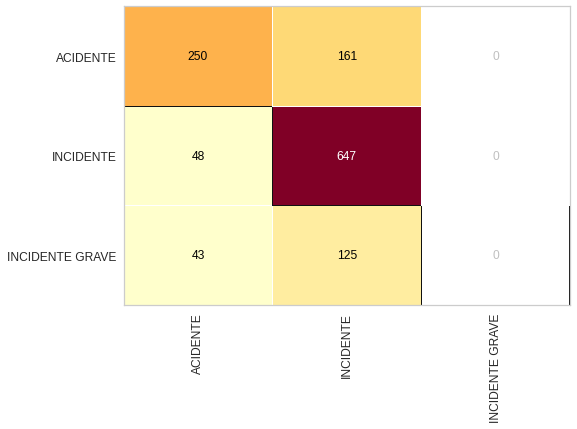

In [96]:
cm = ConfusionMatrix(logistic_Acidente)
cm.fit(X_under_treinamento, Y_under_treinamento)
cm.score(X_under_teste,Y_under_teste)

**Avaliando Precisão e Sensibilidade**

In [97]:
print (classification_report(Y_under_teste,previsoes2))

                 precision    recall  f1-score   support

       ACIDENTE       0.73      0.61      0.66       411
      INCIDENTE       0.69      0.93      0.79       695
INCIDENTE GRAVE       0.00      0.00      0.00       168

       accuracy                           0.70      1274
      macro avg       0.48      0.51      0.49      1274
   weighted avg       0.61      0.70      0.65      1274



O  algoritmo de regressão logística apresentou os piores scores em relação ao SVM e KNN.Deverá ser reavaliado os registros da variável target para incidente grave.

# Conclusão

O modelo de previsão escolhido será o SVM,pois  considerando que o acidente  gere mais  despesa para a empresa, o SVM é  um modelo mais sensível.